In [1]:
# Imports

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Environment check
import os
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/kaggle/input/mcdonalds-ice-cream-machines-broken-timeseries/mcdonalds_dataset.csv')

In [5]:
df.head()

,lat,lon,alt,is_broken,is_active,dot,state,city,street,country,last_checked
0,-73.988281,40.718830,0,False,True,working,NY,New York,114 Delancey St,USA,Checked 142 minutes ago
1,-74.005090,40.728794,0,False,True,working,NY,New York,208 Varick St,USA,Checked 142 minutes ago
2,-73.993408,40.729197,0,False,True,working,NY,New York,724 Broadway,USA,Checked 142 minutes ago
3,-73.985855,40.726555,0,False,True,working,NY,New York,102 1st Ave,USA,Checked 142 minutes ago
4,-73.991692,40.691383,0,True,True,broken,NY,Brooklyn,82 Court St,USA,Checked 142 minutes ago


In [6]:
df.describe()

,lat,lon,alt
count,16671.000000,16671.000000,16671.0
mean,-76.600800,40.406232,0.0
std,37.309030,7.250517,0.0
min,-159.368738,19.517590,0.0
25%,-95.572842,34.927834,0.0
50%,-83.780231,40.213555,0.0
75%,-75.261739,44.860442,0.0
max,14.968594,64.859406,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16671 entries, 0 to 16670
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lat           16671 non-null  float64
 1   lon           16671 non-null  float64
 2   alt           16671 non-null  int64  
 3   is_broken     16671 non-null  bool   
 4   is_active     16671 non-null  bool   
 5   dot           16671 non-null  object 
 6   state         12725 non-null  object 
 7   city          16663 non-null  object 
 8   street        16671 non-null  object 
 9   country       16671 non-null  object 
 10  last_checked  16671 non-null  object 
dtypes: bool(2), float64(2), int64(1), object(6)
memory usage: 1.2+ MB


## **<span style="color:#FFC72C;">1️⃣Which country had most broken machines?</span>**

In [8]:
df['country'].unique()

array(['USA', 'CA', 'UK', 'DE'], dtype=object)

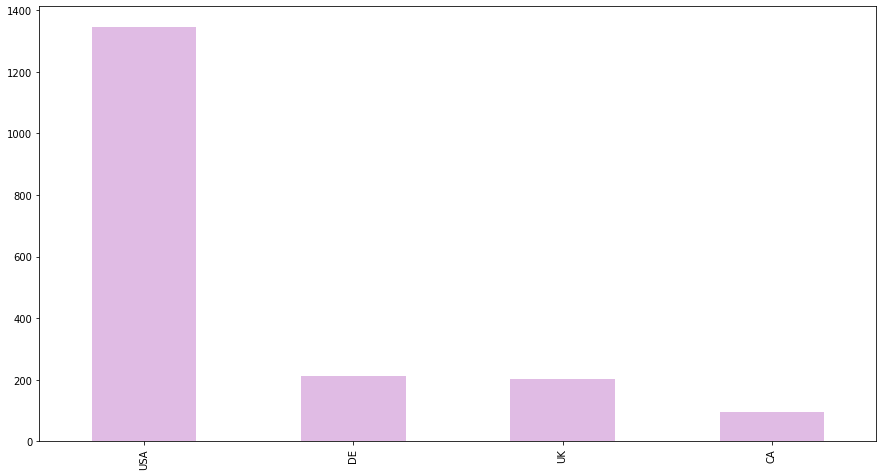

In [9]:
plt.figure(figsize = (15,8))
broken_machines_countries = df.loc[df['is_broken'] == True , 'country'].value_counts().plot(kind = 'bar',color = my_colors[0])
plt.show()

**MC Donalds stores in USA has most broken machines**

## **<span style="color:#FFC72C;">2️⃣Which state had most broken machines?</span>**

In [10]:
df['state'].unique()

array(['NY', 'NJ', 'CT', 'PA', 'DE', 'MA', 'MD', 'RI', 'VT', 'NH', 'DC',
       'VA', 'WV', 'ME', 'NC', 'OH', 'MI', 'KY', 'TN', 'SC', 'IN',
       'Maharastra', 'GA', 'IL', 'WI', 'AL', 'FL', 'IA', 'MO', 'MS', 'AR',
       'MN', 'KS', 'LA', 'NE', 'OK', 'SD', 'ND', 'TX', 'CO', 'MT', 'WY',
       'NM', 'UT', 'AZ', 'ID', 'NV', 'WA', 'OR', 'CA', 'AK', 'HI', nan],
      dtype=object)

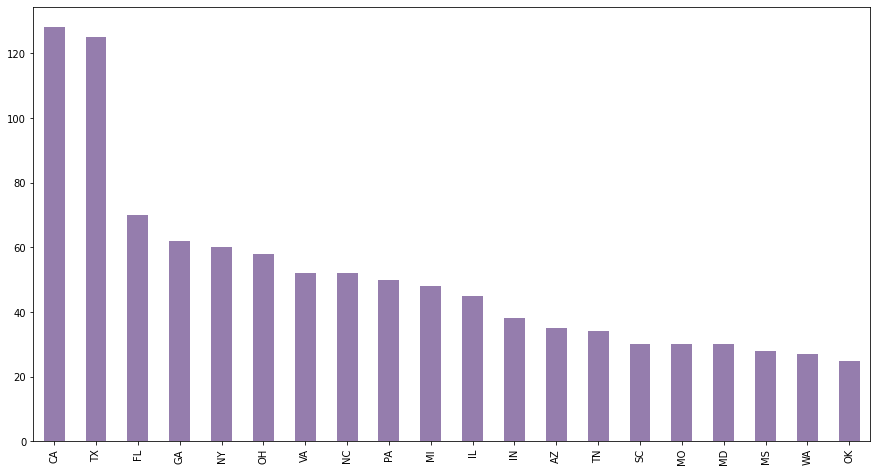

In [11]:
plt.figure(figsize = (15,8))
broken_machines_states = df.loc[df['is_broken'] == True , 'state'].value_counts().head(20).plot(kind = 'bar',color = my_colors[1])
plt.show()

**California and Texas had most broken machines followed by Florida and GA.**

## **<span style="color:#FFC72C;">3️⃣Which City, street had most broken machines?</span>**

In [12]:
df['city'].unique()

array(['New York', 'Brooklyn', 'Jersey City', ..., 'Kiefersfelden',
       'Herleshausen', 'Haren'], dtype=object)

In [13]:
df['street'].unique()

array(['114 Delancey St', '208 Varick St', '724 Broadway', ...,
       'Waller Heerstr. 101', 'Marienplatz 5-7', 'Zierower Landstr. 3'],
      dtype=object)

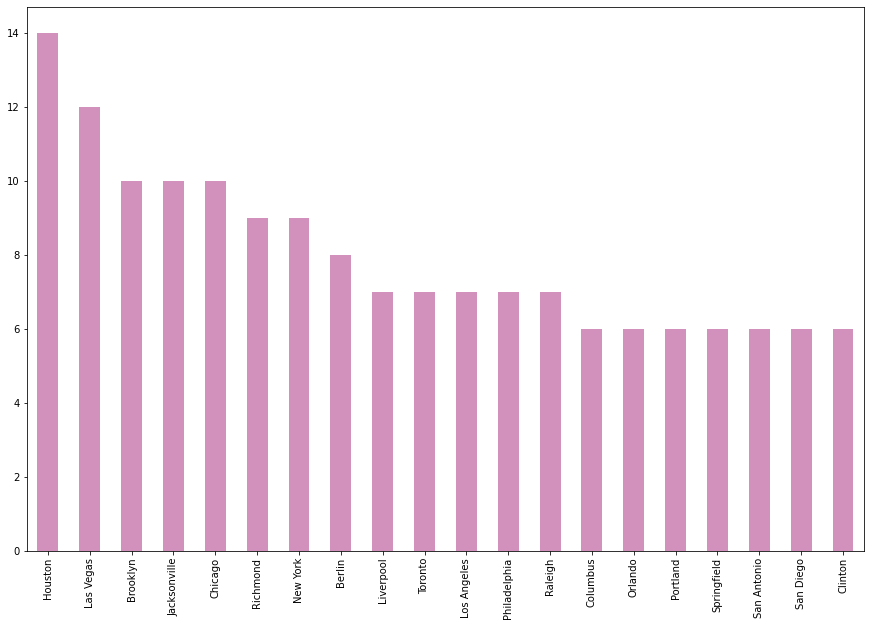

In [14]:
plt.figure(figsize = (15,10))

broken_machines_cities = df.loc[df['is_broken'] == True , 'city'].value_counts().head(20).plot(kind = 'bar',color = my_colors[2])
plt.show()

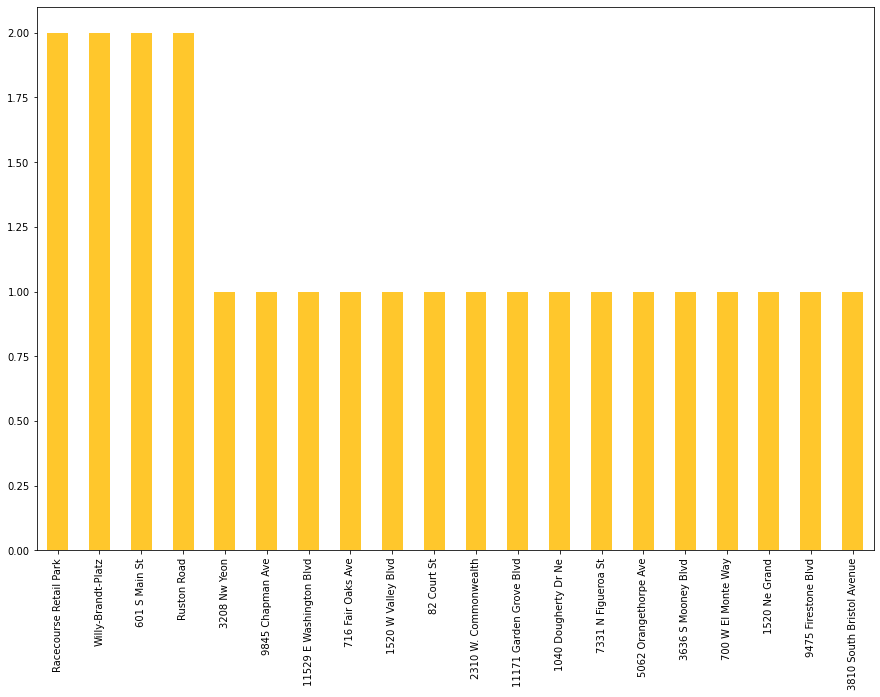

In [15]:
plt.figure(figsize = (15,10))
broken_machines_streets = df.loc[df['is_broken'] == True , 'street'].value_counts().head(20).plot(kind = 'bar',color = my_colors[3])
plt.show()

**Houston, Las Vegas and Brooklyn have most broken machines**

## **<span style="color:#FFC72C;">4️⃣When was the max times machine condition last checked?</span>**

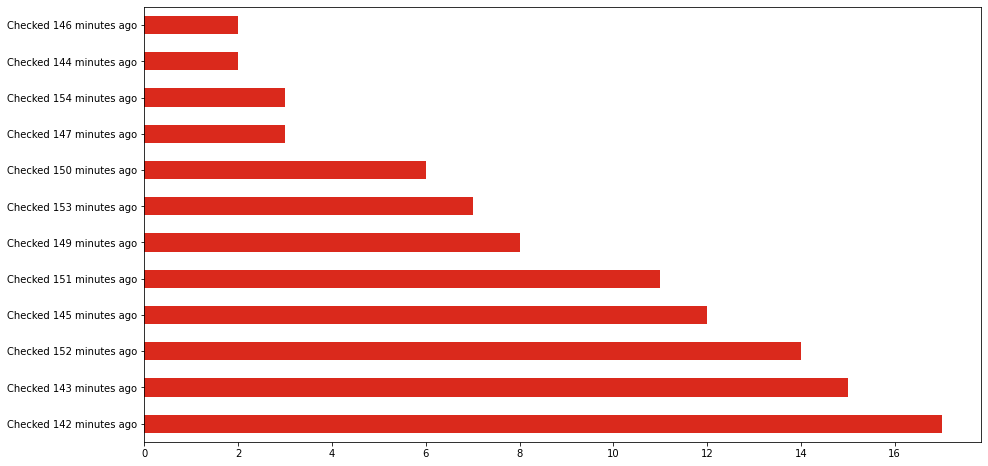

In [16]:
plt.figure(figsize = (15,8))
last_checks_made = df.loc[df['is_broken'] == True , 'last_checked'].head(100).value_counts().plot(kind = 'barh',color = my_colors[4])
plt.show()

**Most number of checks were made 142 minutes ago and then gradually declined.**

## **<span style="color:#FFC72C;">5️⃣How many machines are active?</span>**

In [17]:
df['is_active'].unique()

array([ True, False])

In [18]:
df['is_active'].value_counts()

True     16352
False      319
Name: is_active, dtype: int64

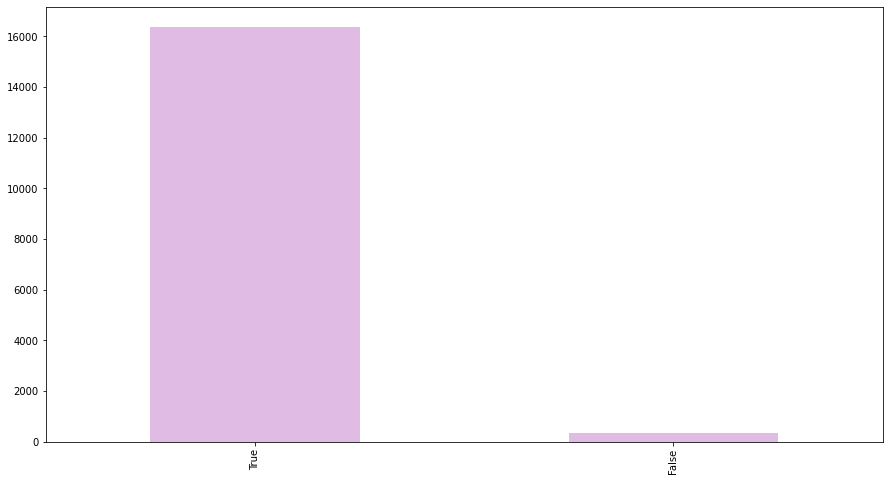

In [19]:
plt.figure(figsize = (15,8))
Active_machines = df['is_active'].value_counts().plot(kind = 'bar',color = my_colors[0])
plt.show()

**There are in total of 16352 active machines while only 319 machines are inactive** 

## **<span style="color:#FFC72C;">6️⃣Locations of all MC Donalds store around the world</span>**

In [20]:
! pip install basemap
from mpl_toolkits.basemap import Basemap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 864.8/864.8 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 24.4 MB/s eta 0:00:00


In [21]:
! pip install -q folium
import folium

In [22]:
#Plotting single coordinate

def generateBaseMap(default_location=[51.5085, -0.1257], default_zoom_start=5):
    """
    location: Define the default location to zoom at when rendering the map
    zoom_start: The zoom level that the map will default to when rendering the map
    control_scale: Shows the map scale for a given zoom level
    """
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [23]:
# londitude and latitude of location where machines are broken

longitude = []
latitude = []
for i in range(len(df)):
    longitude.append(df.loc[df['is_broken'] == True, 'lon'])
    latitude.append(df.loc[df['is_broken'] == True, 'lat'])

In [24]:
top5 = latitude[:5]
top5

[4       -73.991692
 7       -73.990517
 9       -74.043057
 10      -73.980670
 12      -73.987856
            ...    
 16655     9.921029
 16658    10.397448
 16660    10.126603
 16662    12.232317
 16664    10.183519
 Name: lat, Length: 1857, dtype: float64,
 4       -73.991692
 7       -73.990517
 9       -74.043057
 10      -73.980670
 12      -73.987856
            ...    
 16655     9.921029
 16658    10.397448
 16660    10.126603
 16662    12.232317
 16664    10.183519
 Name: lat, Length: 1857, dtype: float64,
 4       -73.991692
 7       -73.990517
 9       -74.043057
 10      -73.980670
 12      -73.987856
            ...    
 16655     9.921029
 16658    10.397448
 16660    10.126603
 16662    12.232317
 16664    10.183519
 Name: lat, Length: 1857, dtype: float64,
 4       -73.991692
 7       -73.990517
 9       -74.043057
 10      -73.980670
 12      -73.987856
            ...    
 16655     9.921029
 16658    10.397448
 16660    10.126603
 16662    12.232317
 16664    10.1

In [25]:
base_map = generateBaseMap()
#fig3=Figure(width=550,height=350)
#fig3.add_child(base_map)
folium.Marker(location=[40.691383, -73.991692],popup='Breach Location',tooltip=' Location 1').add_to(base_map)
folium.Marker(location=[40.736977, -73.990517],popup='Custom Marker 2',tooltip='<strong> Location 2</strong>',icon=folium.Icon(color=my_colors[0],prefix='glyphicon',icon='off')).add_to(base_map)
folium.Marker(location=[40.719843, -74.043057],popup='Custom Marker 3',tooltip='<strong> Location 3</strong>',icon=folium.Icon(color=my_colors[1],prefix='fa',icon='anchor')).add_to(base_map)
folium.Marker(location=[40.688963, -73.980670],popup='Custom Marker 4',tooltip='<strong> Location 4</strong>',icon=folium.Icon(color=my_colors[2],prefix='fa',icon='anchor')).add_to(base_map)
base_map

## **Zoom out to view location**

In [26]:
# New dataframe containing locations where machine is broken
location = pd.DataFrame(
    {'lon': longitude,
     'lat': latitude,
     
    })

In [27]:
location.head(1)

,lon,lat
0,4 40.691383 7 40.736977 9 ...,4 -73.991692 7 -73.990517 9 ...


Text(0, 0.5, 'Latitude')

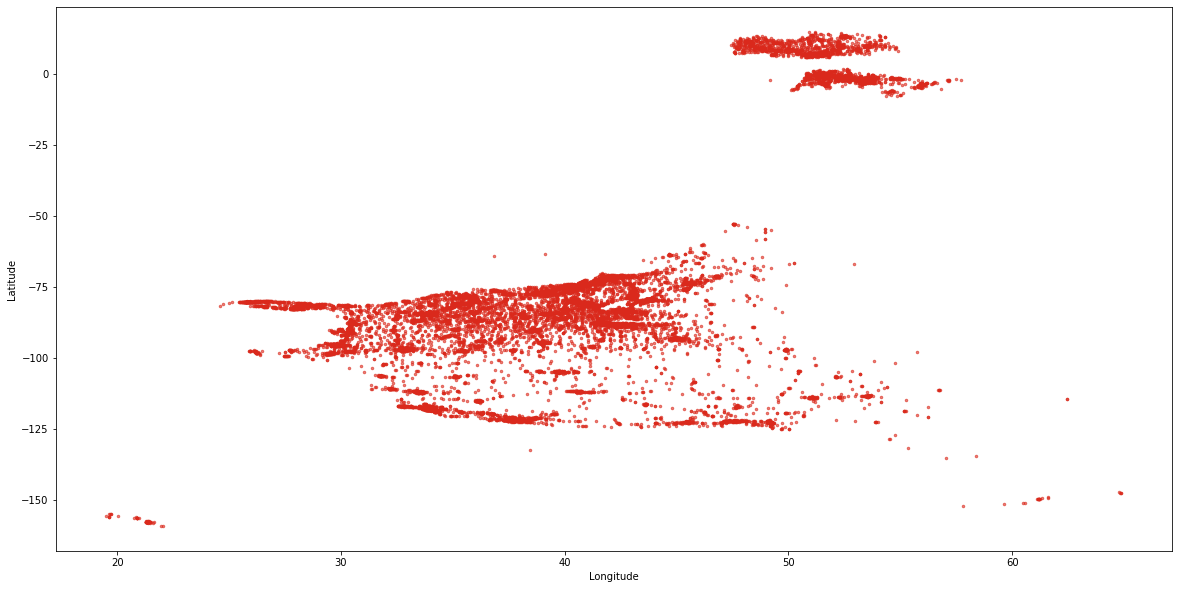

In [28]:
# Plotting the Latitude and Longitude values to see what we get

plt.figure(figsize=(20,10))

# Plot the latitude and Longitude values

plt.plot(df['lon'], df['lat'], '.', alpha=0.6, markersize=5, color=my_colors[4])

plt.xlabel('Longitude')
plt.ylabel('Latitude')


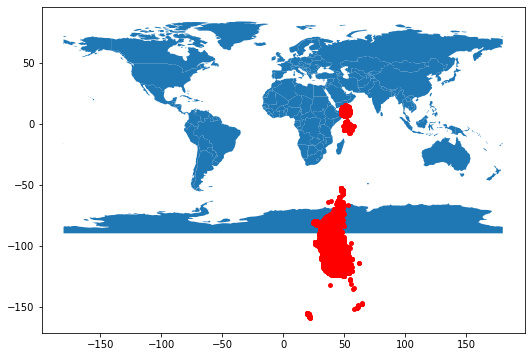

In [29]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['lon'], df['lat'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15);